> <h1><b>TABLE OF CONTENTS</b></h1>
<ul>
    <a href='#1'><li>Data Overview</li></a>
</ul>
<ul>
    <a href='#2'><li>Visualization</li></a>
        <ul>
             <a href='#3'><li>Word Cloud</li></a>
             <a href='#4'><li>Inset Plots</li></a>
             <a href='#5'><li>Histogram</li></a>
             <a href='#6'><li>Box Plots</li></a>
             <a href='#7'><li>Scatter Matrix Plots</li></a>
             <a href='#8'><li>3D Scatter Plot with Colorscaling</li></a>
             <a href='#9'><li>Multiple Subplots</li></a>
        </ul>
</ul>
<ul>
    <a href='#10'><li>Conclusion</li></a>
    <a href='#11'><li>References</li></a>
</ul>

<p id='1'><h2><b>Data Overview</b></h2></p>

This is a game ,named Dota, dataset.  

Here columns that dataset contains:  
* Name  
* Type  
* Alignment  
* Health  
* Mana  
* Damage
* AttackSpeed
* Range
* Armor
* MovementSpeed

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
from plotly.plotly import iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
from wordcloud import WordCloud 

import os
print(os.listdir("../input"))

['dota.csv']


In [2]:
data1 = pd.read_csv("../input/dota.csv")

In [3]:
data1.head()

,Name,Type,Alignment,Health,Mana,Damage,AttackSpeed,Range,Armor,MovementSpeed
0,Rexxar The Beastmaster,Strength,Sentinel,587,208,58,0.69,128,5.0,310
1,Bradwarden the Centaur Warchief,Strength,Sentinel,587,195,56,0.68,100,3.0,300
2,Raigor Stonehoof the Earthshaker,Strength,Sentinel,568,208,51,0.66,128,3.0,300
3,Purist Thunderwrath the Omniknight,Strength,Sentinel,530,221,56,1.44,100,4.0,300
4,Mangix the Pandaren Brewmaster,Strength,Sentinel,587,182,56,0.68,128,3.0,300


Normalization of datas.

In [4]:
data1.Health = [((x-min(data1.Health))/(max(data1.Health)-min(data1.Health)))*100 for x in data1.Health]
data1.Mana = [((x-min(data1.Mana))/(max(data1.Mana)-min(data1.Mana)))*100 for x in data1.Mana]
data1.Damage = [((x-min(data1.Damage))/(max(data1.Damage)-min(data1.Damage)))*100 for x in data1.Damage]
data1.AttackSpeed = [((x-min(data1.AttackSpeed))/(max(data1.AttackSpeed)-min(data1.AttackSpeed)))*100 for x in data1.AttackSpeed]
data1.Range = [((x-min(data1.Range))/(max(data1.Range)-min(data1.Range)))*100 for x in data1.Range]
data1.Armor = [((x-min(data1.Armor))/(max(data1.Armor)-min(data1.Armor)))*100 for x in data1.Armor]
data1.MovementSpeed = [((x-min(data1.MovementSpeed))/(max(data1.MovementSpeed)-min(data1.MovementSpeed)))*100 for x in data1.MovementSpeed]
data1.head()

,Name,Type,Alignment,Health,Mana,Damage,AttackSpeed,Range,Armor,MovementSpeed
0,Rexxar The Beastmaster,Strength,Sentinel,80.0,15.384615,80.000000,9.821429,5.090909,83.333333,6.349206
1,Bradwarden the Centaur Warchief,Strength,Sentinel,80.0,7.692308,74.285714,8.928571,0.000000,50.000000,4.761905
2,Raigor Stonehoof the Earthshaker,Strength,Sentinel,70.0,15.384615,60.000000,7.142857,5.090909,50.000000,4.761905
3,Purist Thunderwrath the Omniknight,Strength,Sentinel,50.0,23.076923,74.285714,76.785714,0.000000,66.666667,4.761905
4,Mangix the Pandaren Brewmaster,Strength,Sentinel,80.0,0.000000,74.285714,8.928571,5.090909,50.000000,4.761905


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 10 columns):
Name             46 non-null object
Type             46 non-null object
Alignment        46 non-null object
Health           46 non-null float64
Mana             46 non-null float64
Damage           46 non-null float64
AttackSpeed      46 non-null float64
Range            46 non-null float64
Armor            46 non-null float64
MovementSpeed    46 non-null float64
dtypes: float64(7), object(3)
memory usage: 3.7+ KB


<p id='2'><h2><b>Visualization</b></h2></p>

<p id='3'><h3><b>Word Cloud</b></h3></p>

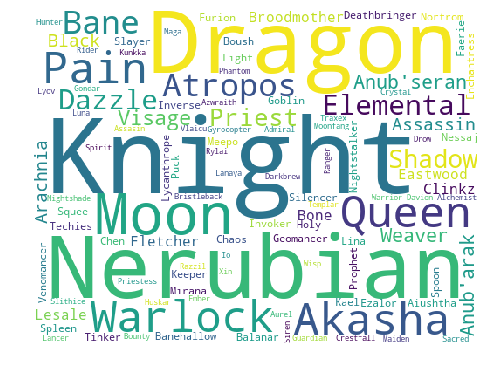

In [6]:
data = data1.Name[:5:-1]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(data))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<p id='4'><h3><b>Inset Plots</b></h3></p>

In [7]:
# first line plot
trace1 = go.Scatter(
    x=data1.index,
    y=data1.Damage,
    name = "Damage",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=data1.index,
    y=data1.Range,
    xaxis='x2',
    yaxis='y2',
    name = "Range",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Damage and Range'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<p id='5'><h3><b>Histogram</b></h3></p>

In [8]:
trace1 = go.Histogram(
    x=data1.Range,
    opacity=0.75,
    name = "Range",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=data1.Mana,
    opacity=0.75,
    name = "Mana",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Mana and Range',
                   xaxis=dict(title='Attack Speed and Range Ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<p id='6'><h3><b>Box Plots</b></h3></p>

In [9]:
trace0 = go.Box(
    y=data1.Health,
    name = 'Health',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=data1.Damage,
    name = 'Damage',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

<p id='7'><h3><b>Scatter Matrix Plots</b></h3></p>

In [10]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
data2 = data1.loc[:,["Mana","Health", "Damage"]]
data2["index"] = np.arange(1,len(data2)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

<p id='8'><h3><b>3D Scatter Plot with Colorscaling</b></h3></p>

In [11]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=data1.index,
    y=data1.Health,
    z=data1.Mana,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<p id='9'><h3><b>Multiple Subplots</b></h3></p>

In [12]:
trace1 = go.Scatter(
    x=data1.index,
    y=data1.Health,
    name = "Health"
)
trace2 = go.Scatter(
    x=data1.index,
    y=data1.Mana,
    xaxis='x2',
    yaxis='y2',
    name = "Mana"
)
trace3 = go.Scatter(
    x=data1.index,
    y=data1.Damage,
    xaxis='x3',
    yaxis='y3',
    name = "Damage"
)
trace4 = go.Scatter(
    x=data1.index,
    y=data1.AttackSpeed,
    xaxis='x4',
    yaxis='y4',
    name = "AttackSpeed"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Health, Damage, Mana and Attack Speed VS Index of Ancients'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<p id='10'><h2><b>Conclusion</b></h2></p>
* In this kernel we used some of the visualization tools.
* We have learned how to use them.
* If you like, please upvote!

<p id='11'><h2><b>Reference</b></h2></p>

https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners